## Importation des librairies et modèles

In [1]:
!git clone https://github.com/timesler/facenet-pytorch facenet_pytorch

Cloning into 'facenet_pytorch'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 1144 (delta 0), reused 0 (delta 0), pack-reused 1143
Receiving objects: 100% (1144/1144), 22.59 MiB | 8.34 MiB/s, done.
Resolving deltas: 100% (550/550), done.


In [0]:
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face  # modèles préentrainés
import torch
from torch.utils.data import DataLoader 
from torchvision import datasets
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image, ImageDraw # gestion des images

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


On définit le modèle de reconnaissance faciale :

In [0]:
mtcnn = MTCNN ()

In [5]:
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

## on utilise face detect, ça nous récupère les coordonnées des rectangles

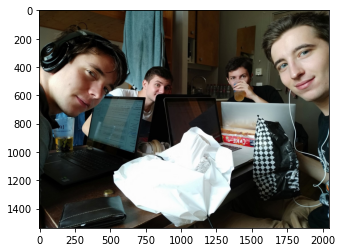

In [6]:
path = 'img_test.jpg'
img = Image.open(path)
img = np.array(img)
plt.imshow(img)

n = 4


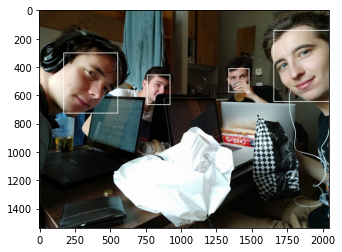

In [8]:
img = Image.open(path)
boxes, probs, points = mtcnn.detect(img, landmarks = True) 
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)
n=0
for i in range (len(boxes)):
    if probs[i] > 0.95:
        draw.rectangle(boxes[i], width=5)
        n+=1
    #extract_face(img, box, save_path='detected_face_{}.png'.format(i))
    '''for p in point:
        draw.rectangle((p - 10).tolist() + (p + 10).tolist(), width=10)
        extract_face(img, box, save_path='detected_face_{}.png'.format(i))'''
print('n =', n)
final = np.array(img_draw)
plt.imshow(final)

RQ : pour N visages repérés, mtcnn.detect renvoit un tuple :

- premier élément, une liste de taille (N, 4). chaque quadruplé donne les coordonnées de 2 points, 2 coins opposés du rectangle, sous la forme : $$ [x_0, y_0, x_1, y_1] $$ \\
- deuxième élément, 4 données donnant la probabilité de reconnaissance de chaque visage


## maintenant on récupère les coordonnées des rectangles et on les agrandit


In [0]:
img = np.array(img)
boxes_up = boxes.copy()
p = 0.3    # pourcentage d'augmentation 
for box in boxes_up:
    l = box[2] - box[0]
    h = box[3] - box[1]
    box[0] -= l*p 
    box[2] += l*p
    box[1] -= h*p
    box[3] += h*p

boxes_up = boxes_up.astype(int)

faces = []
for box in boxes_up:
    face = np.array(img[max(0,box[1]):box[3], max(0, box[0]):box[2], ...])
    faces.append(face)

faces = np.array(faces)

<function matplotlib.pyplot.show>

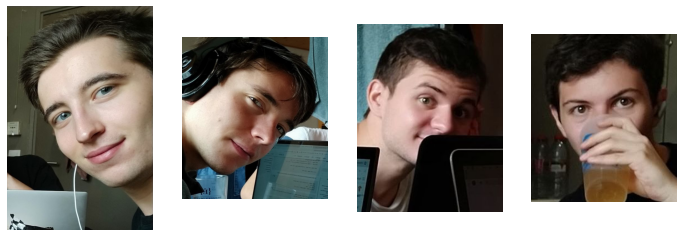

In [10]:
#print(faces[1])
plt.figure(figsize=(12, 12))

for i in range(4):
    plt.subplot(1, 4, i+ 1)
    plt.imshow(faces[i])
    plt.axis('off')
plt.show


In [0]:
help(mtcnn.detect)